<a href="https://colab.research.google.com/github/Nusnan-AM/Final_waterQualty_Models/blob/main/Final_Xgboost_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'augment_data1 (1).csv'
 augment_data1.csv
 catboost_info
'Colab Notebooks'
 Colour_Final.csv
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of augment_data1.csv'
'Copy of randomforest (1).ipynb'
'Copy of randomforest.ipynb'
'CRM Backend.gsheet'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
 data.csv
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_011

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data_PH = pd.read_csv("Final_ph.csv")
data_EC = pd.read_csv("Final_ec.csv")
data_Turbidity = pd.read_csv("Final_turbidity.csv")
data_Colour = pd.read_csv("Final_colour.csv")
data_TDS = pd.read_csv("Final_tds.csv")

In [ ]:
data_PH.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,1/1/2019,500.0,74.7,118.4,64.60,7.32,7.08,7.03,7.06,7.09,...,6.98,6.93,6.83,6.78,2.5,0.52,0.65,20000,4160,5200
1,1/2/2019,484.0,46.7,123.8,67.87,8.51,8.84,8.25,8.37,8.54,...,7.72,7.74,7.71,7.74,0.5,0.20,0.20,4000,1600,1600
2,1/3/2019,326.0,42.1,169.5,78.30,7.43,7.67,7.55,7.43,7.42,...,7.65,7.60,7.54,7.61,4.0,0.65,0.30,32000,5200,2400
3,1/7/2019,454.0,43.4,124.5,68.10,7.16,7.04,7.11,7.05,7.10,...,6.91,6.88,6.89,6.72,1.0,0.18,0.20,8000,1440,1600
4,1/8/2019,307.0,38.3,118.4,86.32,7.09,6.91,6.88,6.86,6.84,...,6.86,6.85,6.84,6.96,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_EC.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,148.1,137.2,144.1,130.1,...,148.4,149.3,156.5,150.0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,180.6,160.4,169.5,160.7,...,155.0,157.3,168.4,165.2,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,180.3,182.3,180.1,180.2,...,166.3,166.3,163.6,164.5,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,145.2,142.1,141.4,141.3,...,141.6,141.4,148.7,144.7,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,130.3,128.4,126.1,127.3,...,145.8,152.9,152.7,148.8,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Turbidity.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,27.2,16.3,74.9,36.0,...,0.61,0.63,0.32,0.84,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,45.7,28.3,14.9,15.7,...,0.40,0.60,0.31,0.42,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,33,31.2,32.6,41.5,...,0.76,0.65,0.78,1.56,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,18.2,16.2,7.15,30.8,...,0.13,0.41,0.92,0.71,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,38,20.6,26.9,25.8,...,0.97,1.00,0.42,0.58,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Colour.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,420.0,155.0,500.0,500.0,...,0.0,2.0,0,0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,409.0,285.0,185.0,158.0,...,0.0,0.0,0,0,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,101.0,90.0,85.0,72.0,...,2.0,3.0,9,10,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,21.0,46.0,64.0,39.0,...,4.0,10.0,8,10,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,124.0,249.0,153.0,210.0,...,0.0,0.0,11,13,3.0,0.15,0.30,24000,1200,2400


In [ ]:
X_ph = data_PH[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ph = data_PH['clear_well']
X_ec = data_EC[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ec = data_EC['clear_well']
X_turbidity = data_Turbidity[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_turbidity = data_Turbidity['clear_well']
X_colour = data_Colour[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_colour = data_Colour['clear_well']
X_tds = data_TDS[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_tds = data_TDS['clear_well']

# TDS

In [ ]:
X_tds_train, X_tds_test, y_tds_train, y_tds_test = train_test_split(X_tds, y_tds, test_size=0.2, random_state=42)

In [ ]:
model_tds=  XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
model_tds.fit(X_tds_train, y_tds_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_tds_pred = model_tds.predict(X_tds_test)
y_tds_pred

array([122.34274 , 122.024345, 126.82599 , 117.18654 , 427.4929  ,
       117.95316 , 115.81252 , 119.022156, 127.13675 , 110.947235,
       105.827515, 121.766304, 119.79383 , 115.40402 , 115.91973 ,
       118.4547  , 121.70678 , 117.808395, 122.130905, 102.33697 ,
       108.08698 , 113.9553  , 115.69079 , 103.583534,  96.57933 ,
       120.16175 , 116.08187 , 131.15205 , 127.92306 ,  87.34538 ,
       109.595184, 139.0846  , 116.14694 , 119.81181 , 116.92545 ,
       115.266685, 124.47972 , 124.85854 , 123.60647 , 114.6054  ,
       117.943924, 115.708786, 115.619125, 119.78722 , 115.53398 ,
       123.15517 , 111.53029 , 118.27386 , 119.83056 ,  87.85967 ,
       110.357544, 142.64194 , 112.643654, 124.62617 , 121.65428 ,
       115.4143  , 127.97065 , 104.28845 , 117.548965, 132.27432 ,
       120.04667 , 106.34146 , 138.78387 , 116.17948 , 118.44908 ,
       109.8571  , 126.62881 , 144.84074 , 110.6264  ,  94.002525,
       122.035934,  90.72316 , 127.06801 ,  97.767426, 118.575

In [ ]:
results_TDS = pd.DataFrame({
    'Actual': y_tds_test.flatten() if hasattr(y_tds_test, 'flatten') else y_tds_test,
    'Predicted': y_tds_pred.flatten() if hasattr(y_tds_pred, 'flatten') else y_tds_pred
})


results_TDS

,Actual,Predicted
428,131.80,122.342743
930,89.78,122.024345
781,149.70,126.825989
451,63.06,117.186539
429,138.90,427.492889
...,...,...
755,138.00,102.601479
526,101.80,109.316444
243,72.62,114.836021
358,124.90,119.473106


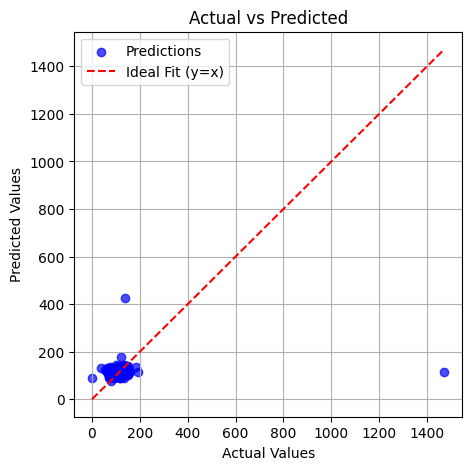

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(5, 5))

plt.scatter(results_TDS['Actual'], results_TDS['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_TDS['Actual'].min(), results_TDS['Predicted'].min())
max_val = max(results_TDS['Actual'].max(),results_TDS['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph=  XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([6.981758 , 6.7954683, 7.117217 , 6.8223295, 6.907618 , 6.9629216,
       7.270669 , 6.987726 , 6.985653 , 6.990934 , 6.88982  , 7.0086937,
       6.8601313, 7.1266737, 7.235282 , 6.9904327, 7.112745 , 6.8432183,
       6.989574 , 7.025189 , 6.9415245, 7.02934  , 7.059282 , 7.110058 ,
       7.115475 , 7.124837 , 7.1853137, 7.212808 , 6.935299 , 7.0417676,
       6.8245263, 6.930462 , 6.8934255, 6.877109 , 7.1040583, 6.9026117,
       7.0004582, 6.905551 , 6.9161587, 6.6857924, 7.1027875, 7.0766077,
       7.088871 , 6.726097 , 6.9336586, 6.95763  , 7.1864862, 7.33654  ,
       7.029796 , 6.9873896, 6.9468822, 7.2539287, 6.94223  , 6.9425974,
       6.9371953, 7.1152363, 6.9211493, 7.144849 , 7.171013 , 7.309384 ,
       7.5046463, 7.135039 , 6.9290576, 6.931801 , 7.0646067, 7.0525355,
       7.0302453, 7.0964055, 7.0706024, 7.29759  , 6.880885 , 7.023052 ,
       6.970405 , 7.011612 , 6.8971033, 6.983926 , 6.896749 , 6.9383507,
       7.0978365, 7.014178 , 7.002318 , 7.058241 , 

In [ ]:
results_PH = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})


results_PH

,Actual,Predicted
428,7.33,6.981758
930,7.51,6.795468
781,6.58,7.117217
451,7.16,6.822330
429,6.72,6.907618
...,...,...
755,7.27,7.023488
526,7.11,7.030355
243,6.88,6.946724
358,6.84,6.699113


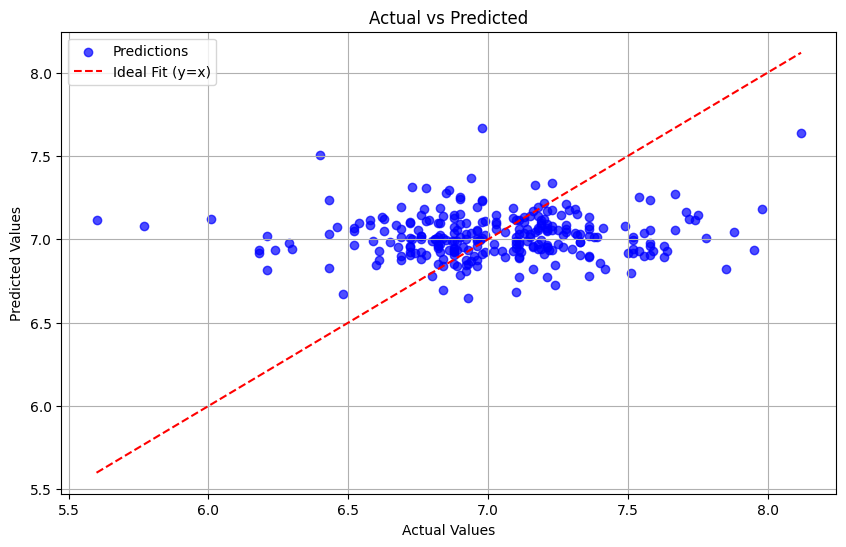

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_PH['Actual'], results_PH['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_PH['Actual'].min(), results_PH['Predicted'].min())
max_val = max(results_PH['Actual'].max(), results_PH['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# EC

In [ ]:
X_ec_train, X_ec_test, y_ec_train, y_ec_test = train_test_split(X_ec, y_ec, test_size=0.2, random_state=42)

In [ ]:
model_ec = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
model_ec.fit(X_ec_train, y_ec_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_ec_pred = model_ec.predict(X_ec_test)
y_ec_pred

array([190.71295, 215.44829, 211.09692, 213.52144, 169.90631, 212.10944,
       221.35294, 195.32387, 218.40086, 213.42162, 189.32954, 168.31633,
       201.13828, 186.72072, 190.14894, 192.33936, 207.19981, 180.32236,
       190.97217, 177.98466, 198.14378, 202.6051 , 223.16725, 184.76884,
       208.76384, 220.19482, 191.95476, 171.92494, 186.23293, 157.65518,
       189.91397, 211.7701 , 139.7497 , 216.34016, 215.43839, 213.01596,
       155.68971, 190.46744, 201.55363, 196.72684, 215.89088, 148.89745,
       218.24286, 194.51558, 192.52658, 210.96405, 157.43349, 194.80127,
       206.85681, 192.14288, 212.92659, 209.35631, 184.86275, 204.3764 ,
       164.4342 , 204.35266, 180.05475, 202.64333, 225.90321, 181.5374 ,
       200.32391, 213.85027, 197.24823, 194.71274, 186.69894, 172.34227,
       180.82527, 199.09505, 198.0089 , 202.09377, 176.45665, 179.25848,
       187.34377, 191.57668, 198.81331, 173.82942, 181.76224, 195.6179 ,
       205.32956, 196.66614, 212.48918, 208.58038, 

In [ ]:
results_EC = pd.DataFrame({
    'Actual': y_ec_test.flatten() if hasattr(y_ec_test, 'flatten') else y_ec_test,
    'Predicted': y_ec_pred.flatten() if hasattr(y_ec_pred, 'flatten') else y_ec_pred
})


results_EC

,Actual,Predicted
49,180.7,190.712952
1096,195.9,215.448288
494,188.9,211.096924
1110,260.8,213.521439
922,187.7,169.906311
...,...,...
1008,154.7,158.559250
1039,147.6,154.419632
1285,176.8,163.793015
1256,188.6,190.362183


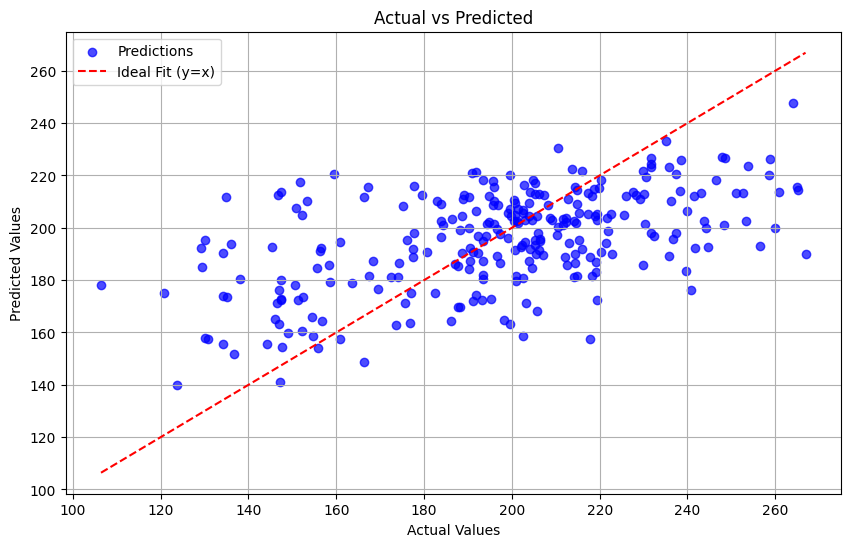

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_EC['Actual'], results_EC['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_EC['Actual'].min(), results_EC['Predicted'].min())
max_val = max(results_EC['Actual'].max(), results_EC['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# Turbidity

In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity =  XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([ 1.0109286 ,  1.2884246 ,  1.3302222 ,  1.1416429 , 12.66425   ,
        3.8434417 ,  1.2427441 ,  0.49968785,  1.8801925 ,  1.8414854 ,
        1.8560765 ,  2.3675761 ,  0.8075761 ,  1.0389013 ,  2.2589824 ,
        1.9851072 ,  1.0243417 ,  1.4569808 ,  1.0976344 ,  0.8525479 ,
        1.168309  ,  1.368223  ,  1.587178  ,  2.1409433 ,  0.6580701 ,
        1.5028477 ,  1.2407105 ,  0.8603694 ,  2.9927979 ,  1.9581416 ,
        1.4679719 ,  0.61658347,  1.1536249 ,  1.3453996 ,  0.6773963 ,
        0.60695666,  1.0995041 ,  0.64656764,  1.0760043 ,  0.6458276 ,
        1.0234087 ,  0.9665057 ,  0.95434684,  1.5379705 ,  1.3400275 ,
        1.2142328 ,  1.8298094 ,  1.2963002 ,  1.6213602 , 11.439458  ,
        0.7004685 ,  4.770647  ,  0.7571476 ,  0.9742848 ,  1.593102  ,
        4.277381  ,  0.6461002 ,  0.86983603,  1.6979804 ,  1.6357477 ,
        1.420658  ,  0.79552776,  1.7520046 ,  1.1725057 ,  1.0502874 ,
        1.7896659 ,  0.9392794 ,  0.6027274 ,  1.2592398 ,  0.91

In [ ]:
results_TURBIDITY = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})

results_TURBIDITY

,Actual,Predicted
51,0.89,1.010929
1102,0.32,1.288425
1314,15.50,1.330222
514,1.82,1.141643
1252,0.56,12.664250
...,...,...
573,0.92,0.947417
243,1.26,1.163521
947,1.60,0.708423
638,1.72,1.265697


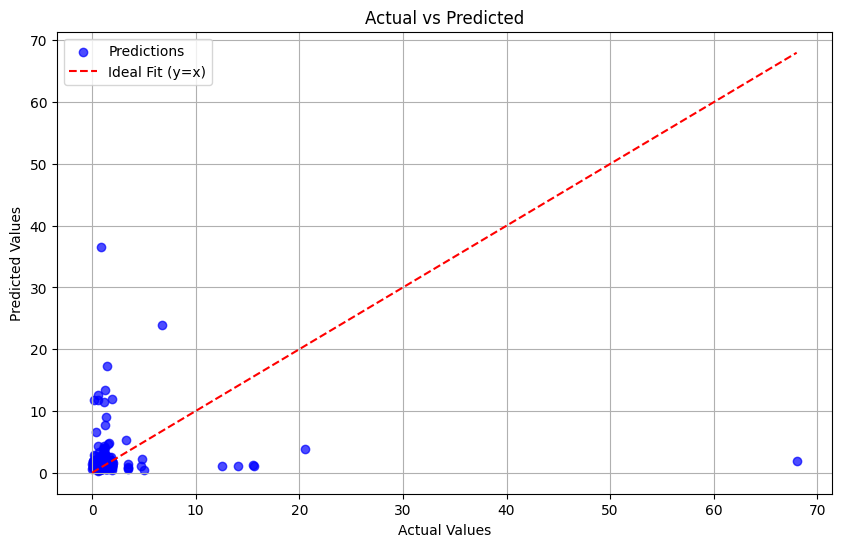

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_TURBIDITY['Actual'], results_TURBIDITY['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_TURBIDITY['Actual'].min(), results_TURBIDITY['Predicted'].min())
max_val = max(results_TURBIDITY['Actual'].max(), results_TURBIDITY['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 8.823234 ,  8.968323 ,  8.199011 , 10.4980955,  7.3823967,
        8.029137 ,  9.629803 , 11.719361 ,  8.484887 ,  9.534909 ,
        8.227793 , 15.46492  , 14.127893 , 13.532289 , 10.999469 ,
        6.4209533,  8.647609 ,  8.847843 , 11.937792 ,  7.8201637,
       13.089504 ,  9.298493 ,  8.675354 , 14.697988 , 10.795813 ,
        8.932397 ,  9.910497 , 10.804206 , 10.759167 ,  9.160208 ,
       10.857194 , 10.376656 ,  7.873472 ,  9.519175 ,  8.112026 ,
        9.457198 ,  7.953461 , 14.122799 , 11.741746 , 10.150291 ,
        8.408913 , 11.102283 ,  9.041043 , 24.105347 ,  9.920974 ,
       44.744488 , 18.871447 , 12.045166 ,  7.650374 , 13.366251 ,
        9.015512 , 10.718403 ,  8.151234 ,  9.252372 , 12.273503 ,
        7.431725 , 10.845087 , 11.604243 , 15.503098 ,  9.770884 ,
       10.411864 ,  9.250363 , 23.4442   ,  9.133474 , 10.791641 ,
        8.787927 , 10.121017 , 21.083492 ,  9.280527 ,  6.5788407,
       10.013891 , 12.036592 ,  9.289995 , 63.8655   ,  9.7163

In [ ]:
results_COLOUR = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_COLOUR

,Actual,Predicted
428,10,8.823234
930,8,8.968323
781,10,8.199011
451,0,10.498096
429,11,7.382397
...,...,...
755,6,6.689553
526,14,9.024845
243,11,13.813876
358,10,12.803562


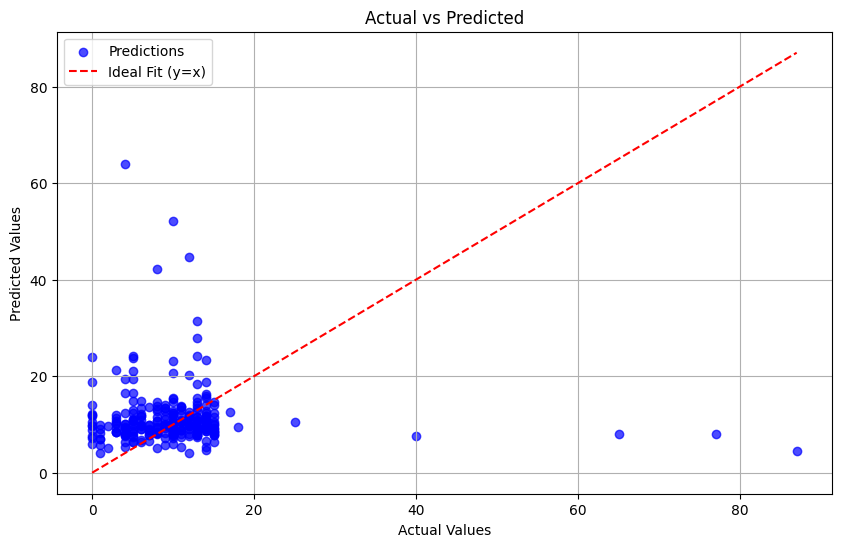

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_COLOUR['Actual'], results_COLOUR['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_COLOUR['Actual'].min(), results_COLOUR['Predicted'].min())
max_val = max(results_COLOUR['Actual'].max(), results_COLOUR['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ec_test, y_ec_pred, "EC")
evaluate_model(y_tds_test, y_tds_pred, "TDS")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 1.76
Mean Squared Error (MSE): 30.67
R-squared (R²): -0.48

Evaluation Metrics for EC:
Mean Absolute Error (MAE): 21.47
Mean Squared Error (MSE): 758.68
R-squared (R²): 0.28

Evaluation Metrics for TDS:
Mean Absolute Error (MAE): 22.97
Mean Squared Error (MSE): 7595.70
R-squared (R²): -0.04

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.14
R-squared (R²): -0.10

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 5.99
Mean Squared Error (MSE): 121.64
R-squared (R²): -0.67


# Hyper Parameter Tunning

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

In [ ]:
!pip install scikit-learn

In [ ]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_tds_train,y_tds_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: 1364.6853944536838


In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_ph_train,y_ph_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best Score: 0.1172630820305884


In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_turbidity_train,y_turbidity_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 20, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best Score: 14.018528221722164


In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_colour_train,y_colour_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 20, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best Score: 196.95692596435546


In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_ec_train,y_ec_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score: 992.3936216975314
